In [26]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from scipy.optimize import curve_fit
import scipy.stats as ss

In [27]:
def population_area(df):   
    """
    Generate a scatter plot for population of 2023 with respect to area 
    """
    plt.figure(dpi=100)
    plt.scatter(df['2023 population'], df['area (km²)'], label='Population vs Area', color='blue', marker='o', alpha=0.5, s=50)
    plt.title('Population vs Area in 2023')
    plt.xlabel('Area(km²)')
    plt.ylabel('Population')
    plt.gca().set_aspect('auto')
    plt.grid(True)
    plt.legend()
    # Show the plot
    plt.show

In [28]:
def plot_2023_worldpopulation(df):
    """
    Generate a pie chart on continent for population by percentage 
    """
    plt.figure(figsize=(8, 8))
    plt.pie(df.groupby('continent')['world percentage'].sum(), labels=df.groupby('continent')['world percentage'].sum().index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('World Population Percentage by Continent (2023)')
    plt.show()
    return

In [29]:
def plot_heatmap(df_1, method):
    """
    Generate a heatmap to visualize the correlation 
    """
    fig, ax = plt.subplots(dpi=144)
    # Mask is used here to prevent the repetition of value
    mask = np.triu(np.ones_like(df_1.corr()))
    sns.heatmap(df_1.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title(method.capitalize())
    # Function to show plot heatmap
    plt.show()
    return

In [30]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_
    return score, inertia

In [31]:
def Plot_Elbow_Method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', 
               color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

In [32]:
def Cluster_Plot(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    #Plot the data with different colors for clusters
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap,marker='o', label='Data')
    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap,marker='x', s=100, label='Estimated Centres')
    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    return

In [33]:
def logistic(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0 and growth rate g
    """
    
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [34]:
df=pd.read_csv('/Users/partht/Downloads/world_population_data.csv',index_col = 'rank')
df

,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
rank,,,,,,,,,,,,,,,,
1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81%,17.85%
2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02%,17.81%
3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50%,4.25%
4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74%,3.47%
5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98%,3.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%


In [35]:
#Changing Datatype of two column to plot a pie chart
df['growth rate'] = df['growth rate'].str.rstrip('%').astype(float)
df['growth rate'] = df['growth rate'].astype(int)
df['world percentage'] = df['world percentage'].str.rstrip('%').astype(float)
df['world percentage'] = df['world percentage'].astype(int)

In [36]:
# Creating variable for pie chart
continent_percentage = df.groupby('continent')['world percentage'].sum().reset_index()

In [37]:
# Created variable containing   necessary for Skewness , Kurtosis , Correlation matrix and Heatmap
df_1 = df[['2023 population','1970 population','area (km²)','density (km²)','growth rate','world percentage']]

In [38]:
# Describing data to understand information of data set such as mean, stanadrd deviation, min and max value. Median values i.e 50% can be found in index column
df.describe()

,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,3.437442e+07,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814500e+05,451.282051,0.611111,0.260684
std,1.373864e+08,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,1979.398922,1.063663,1.630053
min,5.180000e+02,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,4.400000e-01,0.000000,-7.000000,0.000000
25%,4.225982e+05,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,39.500000,0.000000,0.000000
50%,5.643895e+06,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,97.500000,0.000000,0.000000
75%,2.324537e+07,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,242.750000,1.000000,0.000000
max,1.428628e+09,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,21403.000000,4.000000,17.000000


In [39]:
#basic statistics of the data

print('Skewness of the data', end='\n')
print(df_1.skew() , end='\n\n')

print('Kurtosis of the data', end='\n')
print(df_1.kurtosis() , end='\n\n')

Skewness of the data
2023 population     9.133848
1970 population     9.646466
area (km²)          6.082020
density (km²)       8.718273
growth rate        -0.833432
world percentage    9.485585
dtype: float64

Kurtosis of the data
2023 population      90.203850
1970 population     103.547670
area (km²)           43.500877
density (km²)        82.196256
growth rate          10.977405
world percentage     95.122272
dtype: float64



In [40]:
# This corr() method finds the correlation of each column in a DataFrame.
df_1.corr()

,2023 population,1970 population,area (km²),density (km²),growth rate,world percentage
2023 population,1.000000,0.971968,0.452640,-0.026554,-0.033153,0.992318
1970 population,0.971968,1.000000,0.509940,-0.026125,-0.088829,0.965178
area (km²),0.452640,0.509940,1.000000,-0.065203,-0.008967,0.415179
density (km²),-0.026554,-0.026125,-0.065203,1.000000,-0.046937,-0.013647
growth rate,-0.033153,-0.088829,-0.008967,-0.046937,1.000000,-0.052670
world percentage,0.992318,0.965178,0.415179,-0.013647,-0.052670,1.000000


In [41]:
#Clustering the 2023 population and growth rate
df_clust = df[['2023 population','growth rate']].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)

In [42]:
#craeting a list of colors
colours = plt.cm.Set1(np.linspace(0, 1, 5))
cmap = ListedColormap(colours)

#finding the best number of CLusters using silhoutte method
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.96
 3 clusters silhoutte score = 0.76
 4 clusters silhoutte score = 0.52
 5 clusters silhoutte score = 0.56
 6 clusters silhoutte score = 0.57
 7 clusters silhoutte score = 0.59
 8 clusters silhoutte score = 0.60
 9 clusters silhoutte score = 0.59
10 clusters silhoutte score = 0.62
Best number of clusters =  2


In [43]:
#Preprocessing a new dataframe from same dataset for fitting

first_row = df.iloc[[0]]
column_names = df.columns
# Create a new DataFrame with only the first row
df_2 = pd.DataFrame(first_row, columns=column_names)
df_2
columns_to_drop=['cca3','country','continent','area (km²)','density (km²)','growth rate','world percentage']
df_2 = df_2.drop(columns=columns_to_drop)
df_2
column_name_mapping = {'2023 population': '2023','2022 population': '2022','2020 population': '2020','2015 population': '2015','2010 population': '2010','2000 population': '2000','1990 population': '1990','1980 population': '1980','1970 population': '1970'}
# Rename the columns using the dictionary
df_2 = df_2.rename(columns=column_name_mapping)
df_2 = df_2.T
df_2 = df_2.sort_index()
column_name = {1: 'Population'}
df_2 = df_2.rename(columns=column_name)
df_2= df_2.rename_axis('Year')

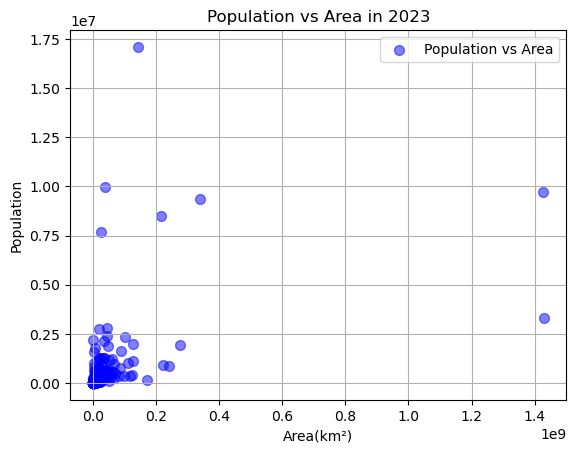

In [44]:
# Plotting Relational graph, Scatter plot
population_area(df)

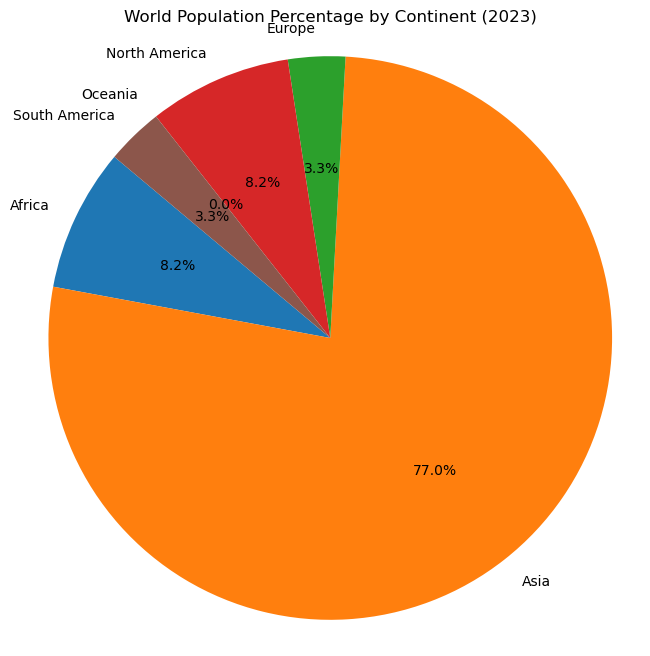

In [45]:
# Plotting Categorical graph , Pie chart
plot_2023_worldpopulation(continent_percentage)

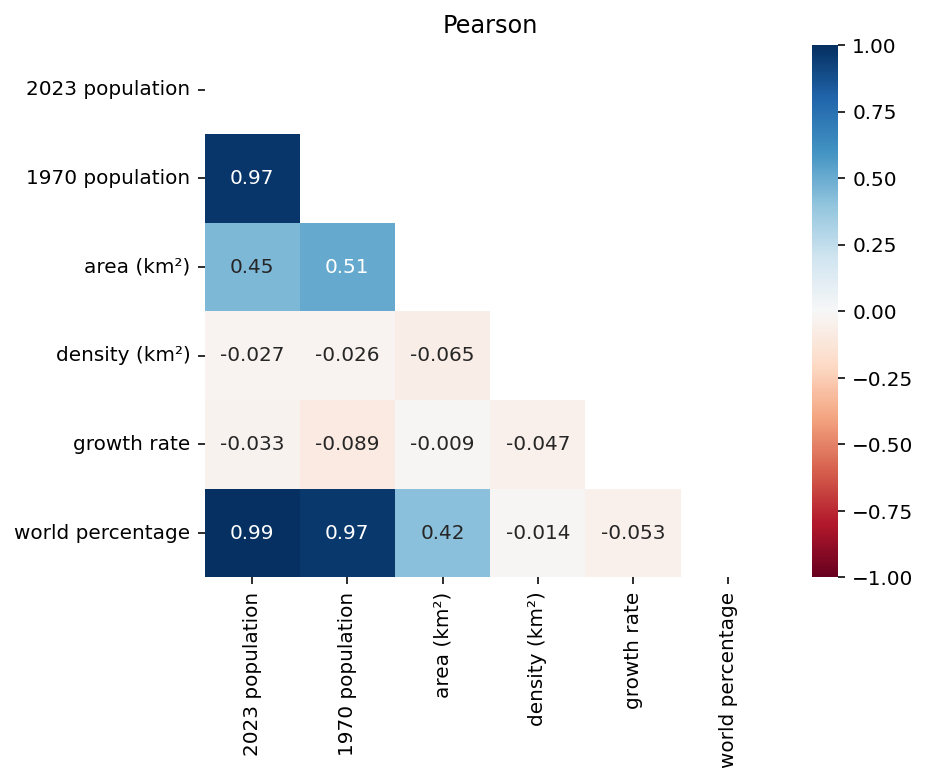

In [46]:
# Plotting Statistical graph, Heatmap
plot_heatmap(df_1,'pearson')

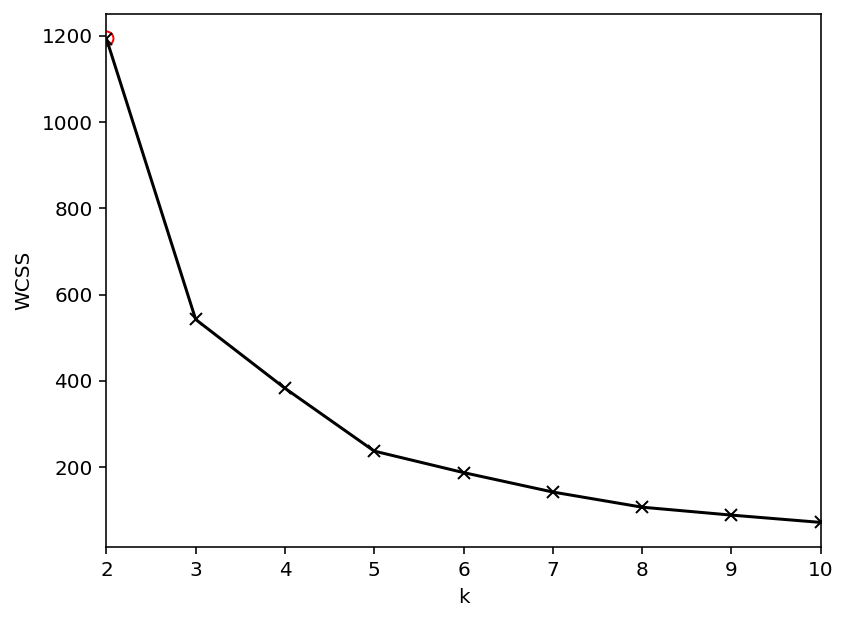

In [47]:
#finding the best number of CLusters using elbow method
Plot_Elbow_Method(2, 10, wcss, best_n)

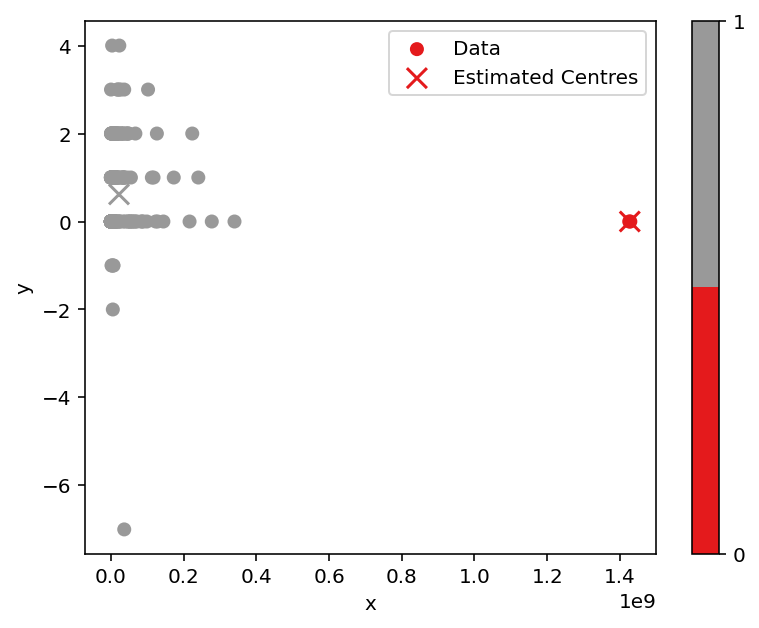

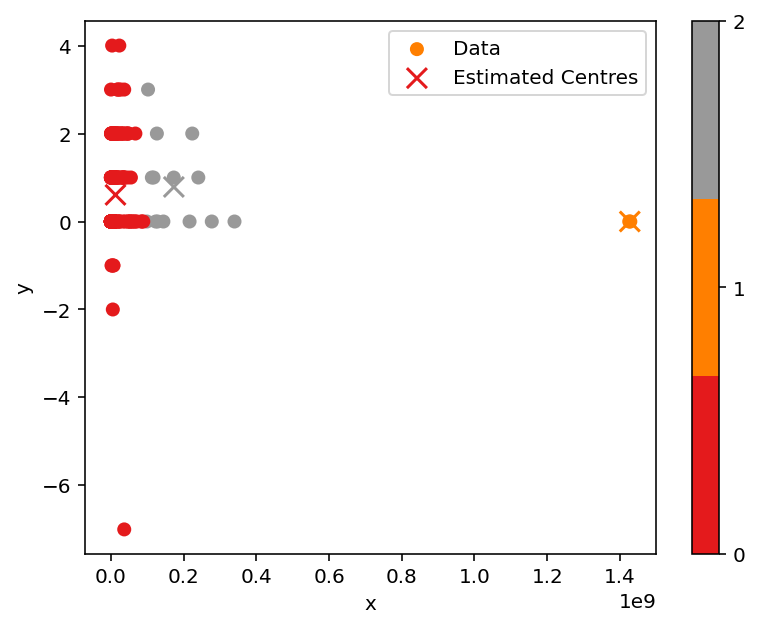

In [48]:
#Cluster plot 
inv_norm = scaler.inverse_transform(norm)  
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    # Plotting clusters
    Cluster_Plot(labels,inv_norm, xkmeans, ykmeans, cenlabels)

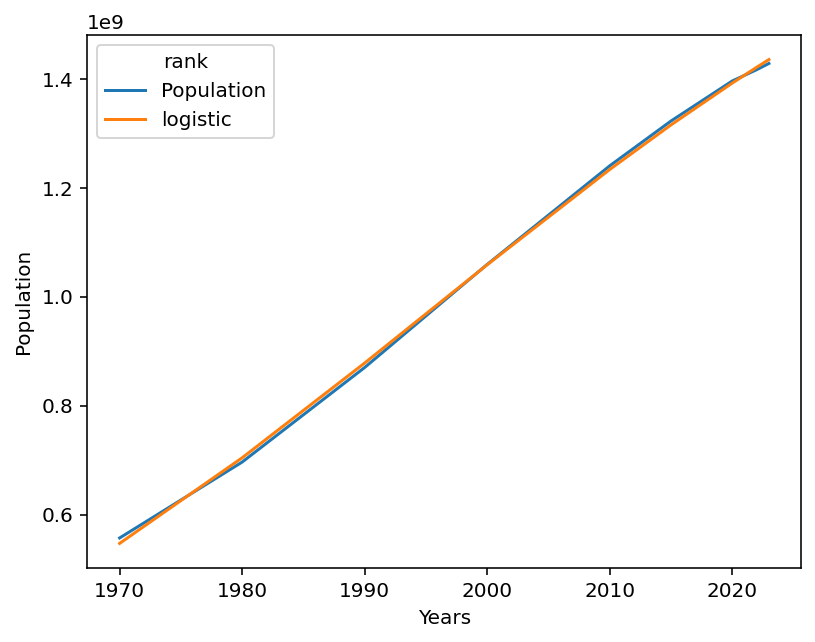

In [49]:
df_2_fit = df_2[['Population']]
df_2_fit.index = df_2.index.astype(int)

# let's normalise the time frame, quite important for exponentials
numeric_index = (df_2_fit.index - 1970).values

#give some initial guesses of N0 and growth
p, cov = curve_fit(logistic, numeric_index, df_2_fit['Population'],
                  p0=(1.2e12, 0.03, 10))

#get uncertainties on each parameter
sigma = np.sqrt(np.diag(cov))

fig, ax = plt.subplots(dpi=144)
#adding a new columns for the logistic fit
df_2_fit= df_2_fit.assign(logistic = logistic(numeric_index, *p))
#plotting the fitted line along with the GDP data
df_2_fit.plot(ax=ax, ylabel='Population',xlabel='Years')
#ax.set_yscale('log')
plt.show()

Pop in 2050: 1.72367e+09
Population of India in 2050: 1.72367e+09
Population in 2050: 1.72367e+09 +/- 2.4166e+07


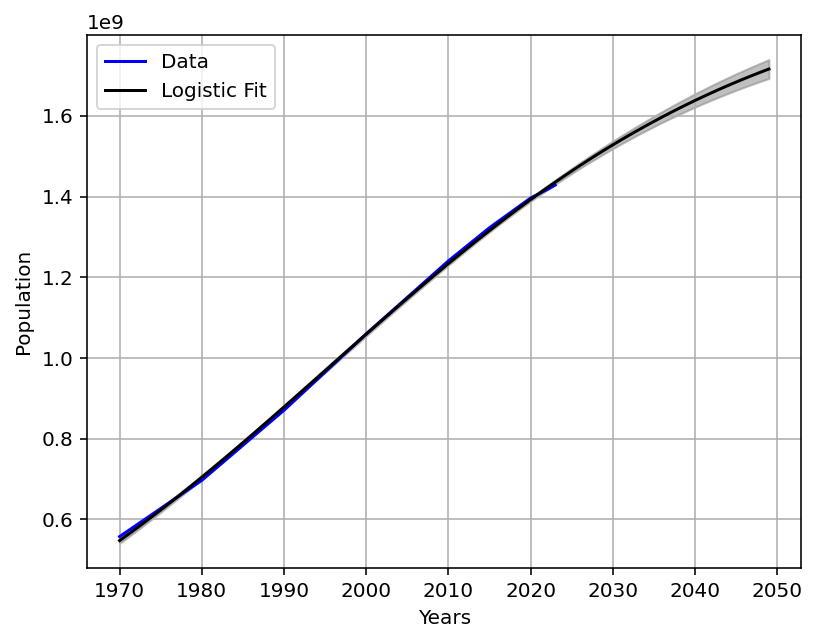

In [50]:
numeric_index = (df_2_fit.index.astype(int) - 1970).values
p, cov = curve_fit(logistic, numeric_index, df_2['Population'],p0=(1.2e12, 0.03, 10))
Pop_2050 = logistic(2050 - 1970, *p) 
print(f"Pop in 2050: {Pop_2050:g}")

#get uncertainties on each parameter
sigma = np.sqrt(np.diag(cov))

#subtract the 2003 as we did when 'training'
Pop_2050 = logistic(2050 - 1970, *p) 
 
print(f"Population of India in 2050: {Pop_2050:g}")

# take 1000 normal random samples for each parameter
sample_params = ss.multivariate_normal.rvs(mean=p, cov=cov, size=1000)

# standard deviation of all possible parameter sampling
Pop_unc_2050 = np.std(logistic(2050 - 1970, *sample_params.T)) 

print(f"Population in 2050: {Pop_2050:g} +/- {Pop_unc_2050:g}")

fig, ax = plt.subplots(dpi=144)
# create array of values within data, and beyond
time_predictions = np.arange(1970, 2050, 1)
# determine predictions for each of those times
Population_predictions = logistic(time_predictions - 1970, *p)
# determine uncertainty at each prediction
Population_uncertainties = [np.std(logistic(future_time - 1970, *sample_params.T)) for future_time in time_predictions]

#ploptting the data along with the logistic fit and the uncertainities
ax.plot(df_2_fit.index, df_2_fit['Population'],'b-', label='Data')
ax.plot(time_predictions, Population_predictions, 'k-', label='Logistic Fit')
ax.fill_between(time_predictions, Population_predictions - Population_uncertainties, Population_predictions + Population_uncertainties, color='gray', alpha=0.5)
#Set the labels, legend and grid
ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.grid()
ax.legend()
#Show the plot
plt.show()